![](https://editor.analyticsvidhya.com/uploads/94357telecom%20churn.png)

# **Introduction to the Telco Customer Churn Dataset**

The provided dataset contains information related to customers of a telecommunications company. It encompasses various attributes that offer insights into the characteristics and behaviors of these customers. The dataset is a valuable resource for conducting analyses and building predictive models to understand and anticipate customer churn.

**Dataset Description**

The dataset comprises the following columns:

- `customerID`: A unique identifier for each customer.
- `gender`: The gender of the customer.
- `SeniorCitizen`: Indicates if the customer is a senior citizen (1) or not (0).
- `Partner`: Indicates if the customer has a partner (Yes) or not (No).
- `Dependents`: Indicates if the customer has dependents (Yes) or not (No).
- `tenure`: The duration, in months, that the customer has been with the company.
- `PhoneService`: Indicates if the customer has phone service (Yes) or not (No).
- `MultipleLines`: Indicates if the customer has multiple lines (Yes, No, or No phone service).
- `InternetService`: The type of internet service the customer has (DSL, Fiber optic, or No).
- `OnlineSecurity`: Indicates if the customer has online security (Yes, No, or No internet service).
- `OnlineBackup`: Indicates if the customer has online backup (Yes, No, or No internet service).
- `DeviceProtection`: Indicates if the customer has device protection (Yes, No, or No internet service).
- `TechSupport`: Indicates if the customer has tech support (Yes, No, or No internet service).
- `StreamingTV`: Indicates if the customer has streaming TV (Yes, No, or No internet service).
- `StreamingMovies`: Indicates if the customer has streaming movies (Yes, No, or No internet service).
- `Contract`: The contract term of the customer (Month-to-month, One year, Two year).
- `PaperlessBilling`: Indicates if the customer has paperless billing (Yes) or not (No).
- `PaymentMethod`: The method by which the customer makes payments.
- `MonthlyCharges`: The monthly amount charged to the customer.
- `TotalCharges`: The total amount charged to the customer.
- `Churn`: Indicates if the customer churned (Yes) or not (No).

**Objective**

The main objective of working with this dataset is to understand the factors that influence customer churn and to build predictive models that can help identify potential churners. By analyzing the provided attributes, we can uncover patterns and insights that may guide business decisions aimed at reducing customer churn and improving customer retention.

The dataset's attributes cover a range of customer-related aspects, from demographic information to service subscriptions and payment behavior. Analyzing this dataset can lead to valuable insights into customer behavior and preferences, which can ultimately contribute to more effective customer relationship management and strategic decision-making.

In the following sections, we will explore and preprocess the dataset, perform exploratory data analysis (EDA), and potentially build predictive models to achieve the stated objectives.

**Libraries Used for Machine Learning and Data Analysis**

In this code, several Python libraries are imported and utilized to perform machine learning tasks and data analysis. Here is a brief overview of the libraries used:

**pandas**:
`pandas` is a powerful data manipulation and analysis library. It provides data structures and functions for efficiently working with structured data, such as tables and CSV files.

**numpy**:
`numpy` is a fundamental package for scientific computing with Python. It provides support for large, multi-dimensional arrays and matrices, as well as a variety of mathematical functions.

**matplotlib and seaborn**:
`matplotlib` and `seaborn` are plotting libraries that allow you to create various types of visualizations, such as histograms, scatter plots, line plots, and more, to help you better understand your data.

**warnings**:
The `warnings` module is used to control and suppress warning messages that might be generated during the code execution. In this code, it is used to filter out specific warning messages.

**sklearn**:
`scikit-learn`, often referred to as `sklearn`, is a widely used machine learning library. It provides tools for classification, regression, clustering, dimensionality reduction, and more.

**imblearn**:
`imblearn` is a library for handling imbalanced datasets in machine learning. It includes techniques for oversampling, undersampling, and generating synthetic samples to address class imbalance.

**LabelEncoder, OneHotEncoder, RobustScaler, StandardScaler, MinMaxScaler**:
These are preprocessing tools from `sklearn` that are used to transform and scale data before feeding it into machine learning algorithms. `LabelEncoder` is used for encoding categorical variables, while scalers like `RobustScaler`, `StandardScaler`, and `MinMaxScaler` normalize and scale numeric features.

**CatBoost, LightGBM, RandomForest, GradientBoosting, LogisticRegression, KNeighbors, SVC, DecisionTree, XGBoost**:
These are machine learning algorithms provided by `catboost`, `lightgbm`, `scikit-learn`, and `xgboost` libraries. They are used for building and training predictive models for classification tasks.

**confusion_matrix**:
`confusion_matrix` is a function from `sklearn.metrics` that calculates the confusion matrix for evaluating the performance of classification models.

**train_test_split, cross_validate, GridSearchCV**:
These functions from `sklearn.model_selection` are used for data splitting, cross-validation, and hyperparameter tuning, respectively. They help in optimizing and assessing the performance of machine learning models.

**logging**:
`logging` is a built-in Python module used for generating log messages during code execution. It can be used to capture important information, warnings, and errors.

Overall, these libraries collectively provide a comprehensive set of tools and functions for data preprocessing, modeling, evaluation, and visualization in machine learning and data analysis tasks.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, RobustScaler, StandardScaler, MinMaxScaler
from catboost import CatBoostClassifier
import logging
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV

# **Configuration Class (CFG) for Data Preprocessing**

The `CFG` class is a configuration class designed to control various data preprocessing steps in a machine learning pipeline. By modifying the attributes within this class, you can easily customize the data preprocessing techniques applied to your dataset before training a machine learning model. Let's explore the attributes and their meanings in more detail.

**Outlier Handling**
- `outlier_clipper`: If set to `True`, outliers in the data will be clipped to a specified range.
- `outlier_remover`: If set to `True`, outliers will be removed from the dataset.
- `outlier_replacer`: If set to `True`, outliers will be replaced with a central value (e.g., mean or median).

**Encoding Techniques**
- `one_hot_encoder`: If set to `True`, categorical variables will be one-hot encoded.
- `label_encoder`: If set to `True`, categorical variables will be label encoded.
- `ordinal_encoder`: If set to `True`, ordinal categorical variables will be encoded.

**Feature Scaling**
- `min_max_scaler`: If set to `True`, data will be scaled using Min-Max scaling.
- `robust_scaler`: If set to `True`, data will be scaled using Robust scaling.
- `standard_scaler`: If set to `True`, data will be scaled using Standard scaling.

**How to Use the CFG Class**

To utilize the `CFG` class for data preprocessing, follow these steps:

1. Modify the attributes within the `CFG` class according to your preprocessing requirements. For example:

   CFG.outlier_clipper = True
   
   CFG.label_encoder = True
   
   CFG.robust_scaler = True
  

2. Use the `CFG` attributes in your data preprocessing pipeline. For instance:

    if CFG.outlier_clipper:
    
    ***Apply outlier clipping codes***

    if CFG.label_encoder:
    
    ***Apply label encoding codes***
 
    if CFG.robust_scaler:
    
    ***Apply Robust scaling codes***



In [3]:
class CFG:
    outlier_clipper = False
    outlier_remover = False
    outlier_replacer = False
    
    one_hot_encoder = False
    label_encoder = True
    ordinal_encoder = True
    
    min_max_scaler = False
    robust_scaler = True
    standard_scaler = False

In [4]:
pd.set_option("display.max_columns",500)
churn_data = pd.read_csv("/kaggle/input/churn-dataset/Telco-Customer-Churn.csv")
df = churn_data.copy()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.drop("customerID", axis=1, inplace=True)

In [6]:
def check_df(data, head=5):
    print("\n******Shape******")
    print(f'Shape     : {df.shape}\n')
    print("\n******Info******")
    print(data.info())
    print("\n******Types******")
    print(data.dtypes)
    print("\n******Head******")
    print(data.head(head))
    print("\n******Missing Values******")
    print(data.isnull().sum())
    print("\n******Duplicated Values******")
    print(data.duplicated().sum())
    print("\n******Unique Values******")
    print(data.nunique())
    print("\n******Describe******")
    print(data.describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95]).T)
    
check_df(df)


******Shape******
Shape     : (7043, 20)


******Info******
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-n

In [7]:
for col in df.columns:
    if df[col].dtype in ['object','category']:
        filtered_values = [value for value in df[col] if pd.notnull(value) and value < '0']
        filtered_values.sort()
        print(col, "=" ,filtered_values)

gender = []
Partner = []
Dependents = []
PhoneService = []
MultipleLines = []
InternetService = []
OnlineSecurity = []
OnlineBackup = []
DeviceProtection = []
TechSupport = []
StreamingTV = []
StreamingMovies = []
Contract = []
PaperlessBilling = []
PaymentMethod = []
TotalCharges = [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
Churn = []


In [8]:
df["TotalCharges"] = df["TotalCharges"].replace(' ', np.nan)
df["TotalCharges"] = df["TotalCharges"].astype(float)
df.dropna(inplace=True)

# **Visualizing Null and Non-Null Values**

In this section, a visualization is created to illustrate the distribution of null and non-null values for each column in the DataFrame (`df`). The code provided generates a horizontal bar chart using `matplotlib` to display the percentage of null and non-null values for each column.

**1. Creating Null Value DataFrame**

The code begins by calculating the count of null values for each column using the `.isnull().sum()` method on the DataFrame. The result is transformed into a DataFrame named `df_null_values`, with columns 'Count', 'Porcentaje_nulos', and 'Porcentaje_no_nulos'. The percentage of null and non-null values is calculated based on the total number of rows.

**2. Generating the Bar Chart**

The horizontal bar chart is created using the `matplotlib` library. The `plt.subplots()` function initializes a figure and axes for plotting. The heights of the bars represent the percentages of null and non-null values for each column.

Two sets of horizontal bars are plotted:
- `rects1`: Represents the percentage of null values (colored in red).
- `rects2`: Represents the percentage of non-null values (colored in orange).

Axis labels, ticks, title, and legend are added to enhance the visualization. The `autolabel()` function is defined to add percentage labels to the bars.

Finally, the visualization is displayed using `plt.tight_layout()` and `plt.show()`.


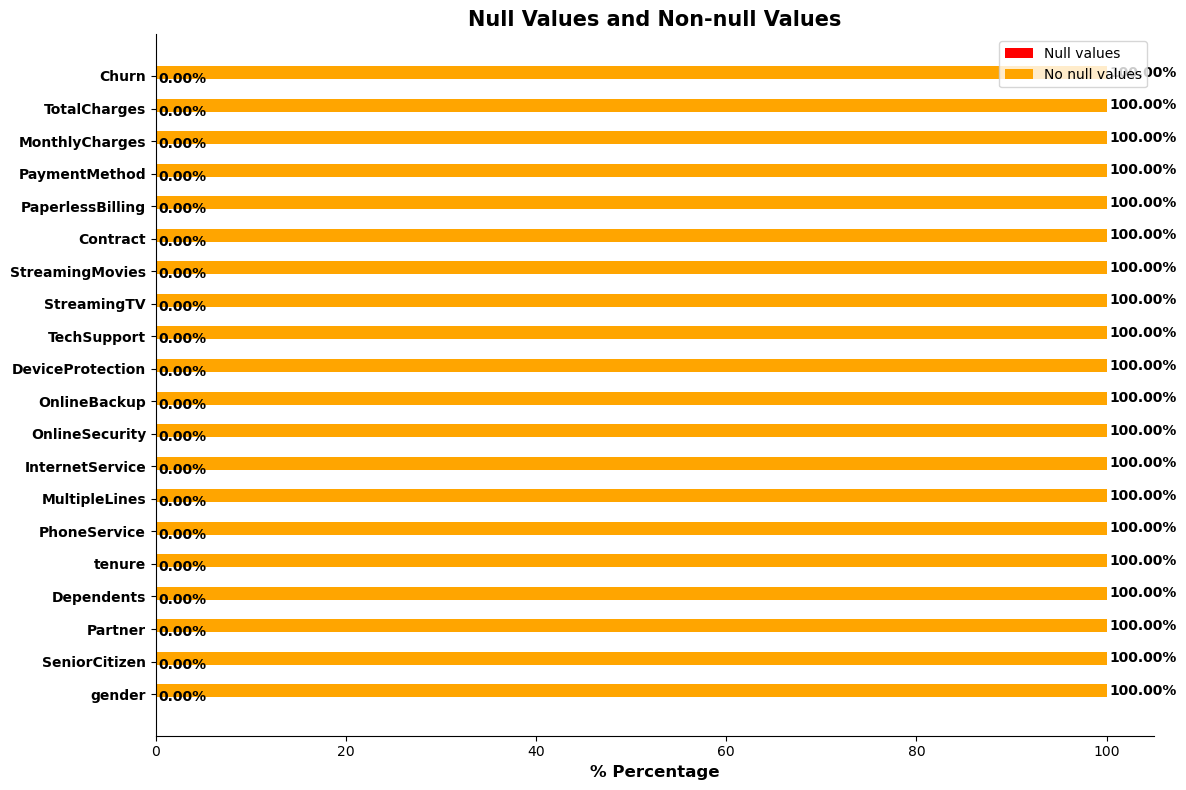

In [9]:
df_null_values = df.isnull().sum().to_frame().rename(columns={0: 'Count'})
df_null_values['Percentage_nulls'] = (df_null_values['Count'] / len(df)) * 100
df_null_values['Percentage_no_nulls'] = 100 - df_null_values['Percentage_nulls']

n = len(df_null_values.index)
x = np.arange(n)

fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.4
gap = 0.2

rects1 = ax.barh(x - gap / 2, df_null_values['Percentage_nulls'], bar_width, label='Null values', color='red')
rects2 = ax.barh(x + gap / 2, df_null_values['Percentage_no_nulls'], bar_width, label='No null values', color='orange')

ax.set_title('Null Values and Non-null Values', fontsize=15, fontweight='bold')
ax.set_xlabel('% Percentage', fontsize=12, fontweight='bold')
ax.set_yticks(x)
ax.set_yticklabels(df_null_values.index, fontsize=10, fontweight='bold') 

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend()

def autolabel(rects):
    for rect in rects:
        width = rect.get_width()
        ax.annotate(f'{width:.2f}%',
                    xy=(width, rect.get_y() + rect.get_height() / 2),
                    xytext=(2, 0),
                    textcoords="offset points",
                    ha='left', va='center', size=10, weight='bold')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

In [10]:
for col in df.columns:
    print(df[col].value_counts(),"\n")

Male      3549
Female    3483
Name: gender, dtype: int64 

0    5890
1    1142
Name: SeniorCitizen, dtype: int64 

No     3639
Yes    3393
Name: Partner, dtype: int64 

No     4933
Yes    2099
Name: Dependents, dtype: int64 

1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64 

Yes    6352
No      680
Name: PhoneService, dtype: int64 

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64 

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64 

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64 

No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64 

No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: 

In [11]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [12]:
def grab_col_names(dataframe, cat_th=10, car_th=20, print_results=True):

    '''
   Returns the names of categorical, numeric and categorical but cardinal variables in the data set.
   Note Categorical variables include categorical variables with numeric appearance.

    Parameters
    ------
        dataframe: dataframe
                Dataframe to get variable names
        cat_th: int, optional
                class threshold for numeric but categorical variables
        car_th: int, optinal
                class threshold for categorical but cardinal variables
    Returns
    ------
        cat_cols: list
                Categorical variable list
        num_cols: list
                Numeric variable list
        cat_but_car: list
                List of cardinal variables with categorical view
    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))

    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        The sum of 3 lists with return equals the total number of variables: cat_cols + num_cols + cat_but_car = number of variables
    '''

    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object", "bool"]]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < 10 and dataframe[col].dtypes in ["int64", "float64"]]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > 20 and str(dataframe[col].dtypes) in ["category", "object"]]
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    cat_cols = cat_cols + num_but_cat
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["int64", "float64"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    if print_results:
        print(f'Observations {dataframe.shape[0]}')
        print(f'Variables:  {dataframe.shape[1]}')
        print(f'cat_cols:  {len(cat_cols)}')
        print(f'num_cols:  {len(num_cols)}')
        print(f'cat_but_car:  {len(cat_but_car)}')
        print(f'num_but_cat:  {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations 7032
Variables:  20
cat_cols:  17
num_cols:  3
cat_but_car:  0
num_but_cat:  1


# **Function to Calculate Outlier Thresholds**

The provided Python function, `outlier_thresholds`, is designed to calculate the lower and upper outlier thresholds for a given column in a DataFrame. These thresholds are essential for identifying potential outliers within the data. The function employs the Interquartile Range (IQR) method, a robust statistical measure, to determine the threshold values.


In [13]:
def outlier_thresholds(dataframe, col, low_quantile=0.25, up_quantile=0.75):
    
    quantile_one = dataframe[col].quantile(low_quantile)
    quantile_three = dataframe[col].quantile(up_quantile)
    
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    
    return  low_limit, up_limit

# **Outlier Detection Function and Usage Example**

The provided Python function, `check_outlier`, is designed to detect outliers in a specific column of a DataFrame based on the calculated outlier thresholds. The function utilizes the `outlier_thresholds` function previously described to determine if there are any data points outside the calculated threshold range.

In [14]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False
    
for col in num_cols:
    print(f"{col}, outlier detection is {check_outlier(df, col)}")

tenure, outlier detection is False
MonthlyCharges, outlier detection is False
TotalCharges, outlier detection is False


# **Box Plot Visualization Function and Usage Example**

The provided Python function, `plot_boxplots`, is designed to create box plot visualizations for a set of numeric columns in a DataFrame. Box plots are useful for visualizing the distribution, central tendency, and spread of data within each column.

**How It Works**
1. The function calculates the number of rows (`nrows`) required to accommodate all the specified numeric columns in the plot grid.
2. It creates a subplot grid with the specified number of rows and `ncols`.
3. For each numeric column, a box plot is generated using `sns.boxplot`, and the resulting plot is placed in the corresponding subplot.
4. The title of each subplot is set to indicate the column name.


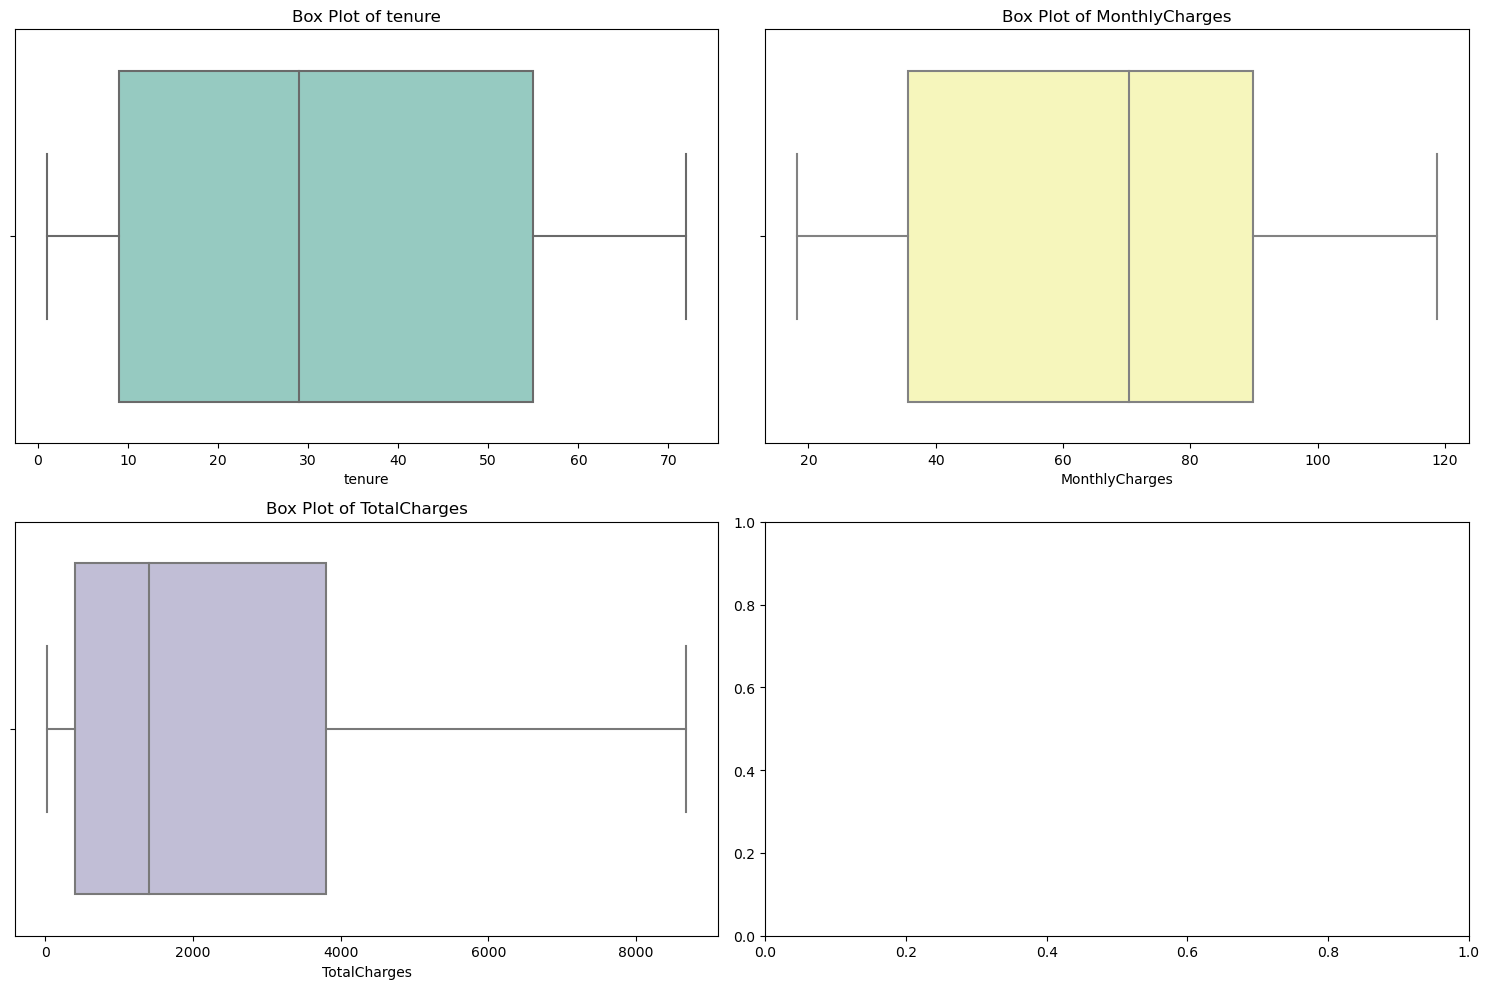

In [15]:
def plot_boxplots(dataframe, num_cols, ncols=2):
    nrows = (len(num_cols) + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5*nrows))
    
    colors = sns.color_palette('Set3', n_colors=len(dataframe.columns))
    
    for i, col in enumerate(num_cols):
        if col in dataframe.columns:
            ax = axes[i // ncols, i % ncols]
            sns.boxplot(x=dataframe[col], ax=ax, color=colors[i])
            ax.set_title(f"Box Plot of {col}")

    plt.tight_layout()
    plt.show()

plot_boxplots(df, num_cols)

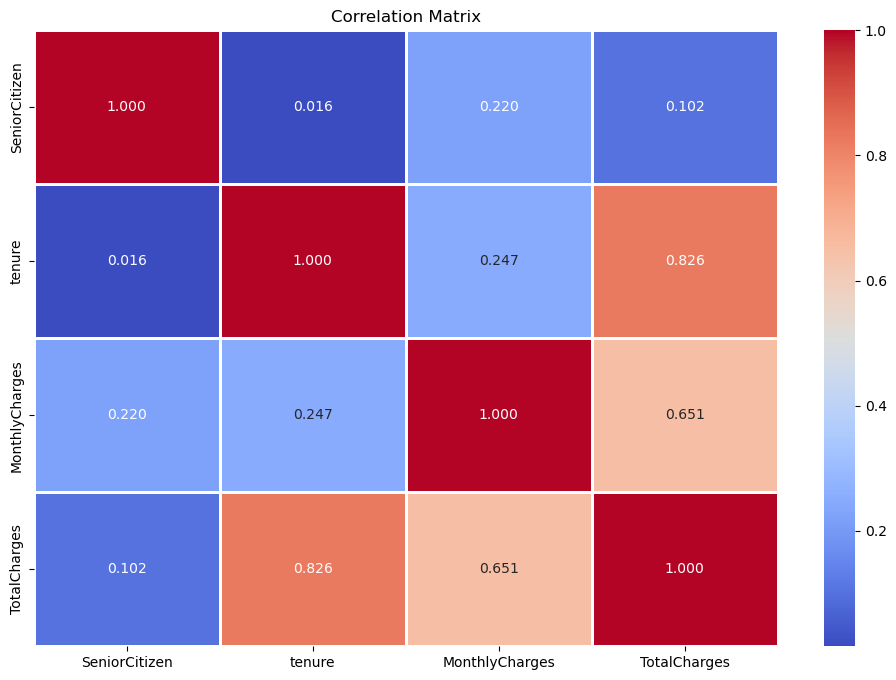

In [16]:
def correlation_matrix(dataframe):
    num_cols = dataframe.select_dtypes(include=[int,float]).columns

    variables = num_cols
    data = dataframe[variables]
    correlation_matrix = data.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f", linewidths=1)
    plt.title('Correlation Matrix')
    
correlation_matrix(df)

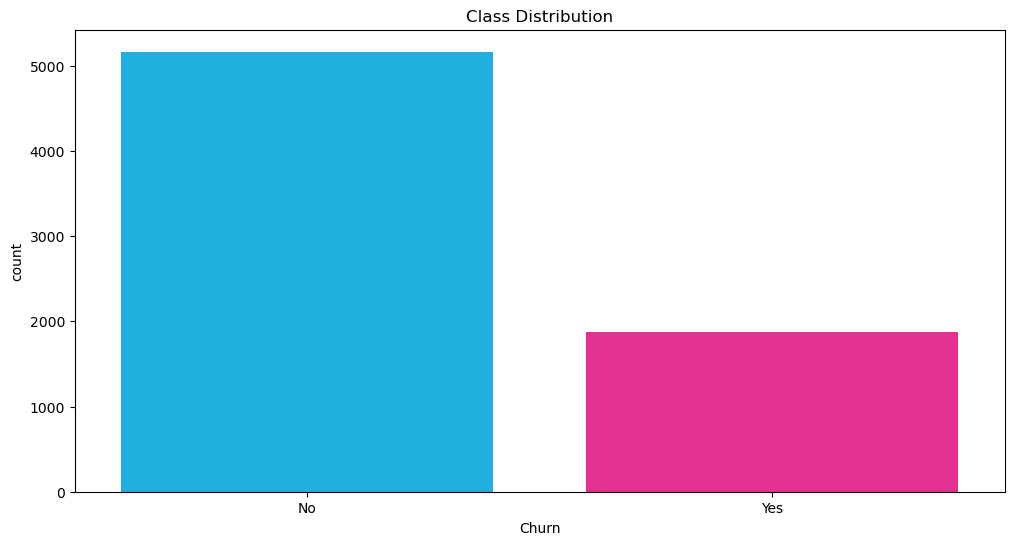

% of no values       : 73.42150170648463
Number of no total values     : 5163
% of yes values         : 26.578498293515356
Number of yes total values    : 1869


In [17]:
def plot_target(dataframe, column):
    my_pal = {'No': 'deepskyblue', 'Yes': 'deeppink'}

    plt.figure(figsize = (12, 6))
    ax = sns.countplot(x = 'Churn', data = df, palette = my_pal)
    plt.title('Class Distribution')
    plt.show()

    Count_Normal_transacation = len(df[df['Churn']=='No'])
    Count_Fraud_transacation = len(df[df['Churn']=='Yes'])
    Percentage_of_Normal_transacation = Count_Normal_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
    print('% of no values       :', Percentage_of_Normal_transacation*100)
    print('Number of no total values     :', Count_Normal_transacation)
    Percentage_of_Fraud_transacation= Count_Fraud_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
    print('% of yes values         :',Percentage_of_Fraud_transacation*100)
    print('Number of yes total values    :', Count_Fraud_transacation)

plot_target(df,'Churn')

# **Segmentation of Data Based on 'tenure' Column**

The provided code snippet demonstrates how to create a new column called 'segment_class' in a DataFrame by segmenting the data based on the 'tenure' column using quantiles. This segmentation assigns each data point to one of the specified segments or labels.

**Code Explanation**

1. `num_segments = 3`: The number of segments or quantiles you want to create.

2. `labels = [3, 2, 1]`: The labels assigned to each segment. These labels will be assigned based on the quantile ranges, where the higher label corresponds to higher 'tenure' values.

3. `pd.qcut(df['tenure'], q=num_segments, labels=labels)`: The `qcut` function is used to perform quantile-based discretization of the 'tenure' column. It divides the data into the specified number of quantiles (segments) and assigns labels based on the provided labels list.

In [18]:
num_segments = 3
labels = [3,2,1]
df['segment_class'] = pd.qcut(df['tenure'], q=num_segments, labels=labels)
df['segment_class'] = df['segment_class'].astype(float)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,segment_class
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,3.0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,2.0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,3.0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,2.0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,3.0


# **Function to Calculate Total Services and Apply to DataFrame**

The provided code defines a Python function `total_service` that calculates the total number of services subscribed by a customer based on various criteria related to services such as phone service, online security, and online backup. The function is then applied to each row of a DataFrame to create a new column called "Total_Services."

**Function Explanation**

The `total_service` function takes a row of data as input and applies specific rules to determine the total number of services subscribed by a customer.

**Rules and Criteria for Service Calculation**

The function uses a series of conditions and logical operators to determine the total number of services:

- If the customer has phone service, online security, online backup, and either DSL or fiber optic internet service, the total is set to 4.
- If the customer has phone service, online security, and online backup, but no internet service, or has phone service, online security, online backup, and either DSL or fiber optic internet service, the total is set to 3.
- If the customer has phone service and either online security or online backup, with or without internet service, or has phone service, online security, online backup, and either DSL or fiber optic internet service, the total is set to 2.
- If the customer has phone service and either online security or online backup, with or without internet service, or has phone service, online security, online backup, and either DSL or fiber optic internet service, the total is set to 1.
- If none of the above conditions are met, the total is set to 0.

In [19]:
def total_service(row):
    
    if (row["PhoneService"] == "Yes" and row["OnlineSecurity"] == "Yes" and row["OnlineBackup"] == "Yes" and
       (row["InternetService"]=="DSL" or row["InternetService"]=="Fiber optic")):
        return 4
    
    elif ((row["PhoneService"] == "Yes" and row["OnlineSecurity"] == "Yes" and row["OnlineBackup"] == "Yes" and
          row["InternetService"]=="No") or
          
          (row["PhoneService"] == "Yes" and row["OnlineSecurity"] == "Yes" and row["OnlineBackup"] == "No" and
          (row["InternetService"]=="DSL" or row["InternetService"]=="Fiber optic")) or
          
          (row["PhoneService"] == "Yes" and row["OnlineSecurity"] == "No" and row["OnlineBackup"] == "Yes" and
          (row["InternetService"]=="DSL" or row["InternetService"]=="Fiber optic")) or 
          
          (row["PhoneService"] == "No" and row["OnlineSecurity"] == "Yes" and row["OnlineBackup"] == "Yes" and
          (row["InternetService"]=="DSL" or row["InternetService"]=="Fiber optic"))):
        return 3
    
    elif ((row["PhoneService"] == "Yes" and row["OnlineSecurity"] == "Yes" and row["OnlineBackup"] == "No" and
          row["InternetService"]=="No") or
          
          (row["PhoneService"] == "Yes" and row["OnlineSecurity"] == "No" and row["OnlineBackup"] == "Yes" and
           row["InternetService"]=="No") or
          
          (row["PhoneService"] == "No" and row["OnlineSecurity"] == "Yes" and row["OnlineBackup"] == "Yes" and
           row["InternetService"]=="No") or 
          
          (row["PhoneService"] == "No" and row["OnlineSecurity"] == "No" and row["OnlineBackup"] == "Yes" and
          (row["InternetService"]=="DSL" or row["InternetService"]=="Fiber optic")) or
          
          (row["PhoneService"] == "No" and row["OnlineSecurity"] == "Yes" and row["OnlineBackup"] == "No" and
          (row["InternetService"]=="DSL" or row["InternetService"]=="Fiber optic")) or
         
          (row["PhoneService"] == "Yes" and row["OnlineSecurity"] == "No" and row["OnlineBackup"] == "No" and
          (row["InternetService"]=="DSL" or row["InternetService"]=="Fiber optic"))):
        return 2
    
    elif ((row["PhoneService"] == "Yes" and row["OnlineSecurity"] == "No" and row["OnlineBackup"] == "No" and
          row["InternetService"]=="No") or
          
          (row["PhoneService"] == "No" and row["OnlineSecurity"] == "Yes" and row["OnlineBackup"] == "No" and
          row["InternetService"]=="No") or
          
          (row["PhoneService"] == "No" and row["OnlineSecurity"] == "No" and row["OnlineBackup"] == "Yes" and
          row["InternetService"]=="No") or 
          
          (row["PhoneService"] == "No" and row["OnlineSecurity"] == "No" and row["OnlineBackup"] == "No" and
          (row["InternetService"]=="DSL" or row["InternetService"]=="Fiber optic"))):
        return 1
    else:
        return 0

    
df["Total_Services"] = df.apply(total_service, axis=1)

# **Function to Calculate Total Streaming Services and Apply to DataFrame**

The provided code defines a Python function `total_streaming` that calculates the total number of streaming services subscribed by a customer based on their usage of streaming TV and streaming movies. The function is then applied to each row of a DataFrame to create a new column called "Total_Streaming."

**Function Explanation**

The `total_streaming` function takes a row of data as input and applies specific rules to determine the total number of streaming services subscribed by a customer.

**Rules and Criteria for Streaming Service Calculation**

The function uses conditions and logical operators to determine the total number of streaming services:

- If the customer has both streaming TV and streaming movies, the total is set to 2.
- If the customer has either streaming TV or streaming movies, the total is set to 1.
- If none of the above conditions are met, the total is set to 0.

In [20]:
def total_streaming(row):
    if row["StreamingTV"]=="Yes" and row["StreamingMovies"]=="Yes":
        return 2
    elif ((row["StreamingTV"]=="Yes" and row["StreamingMovies"]=="No") or 
         (row["StreamingTV"]=="No" and row["StreamingMovies"]=="Yes")):
        return 1
    else:
        return 0
    
df["Total_Streaming"] = df.apply(total_streaming, axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,segment_class,Total_Services,Total_Streaming
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,3.0,2,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,2.0,3,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,3.0,4,0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,2.0,2,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,3.0,2,0


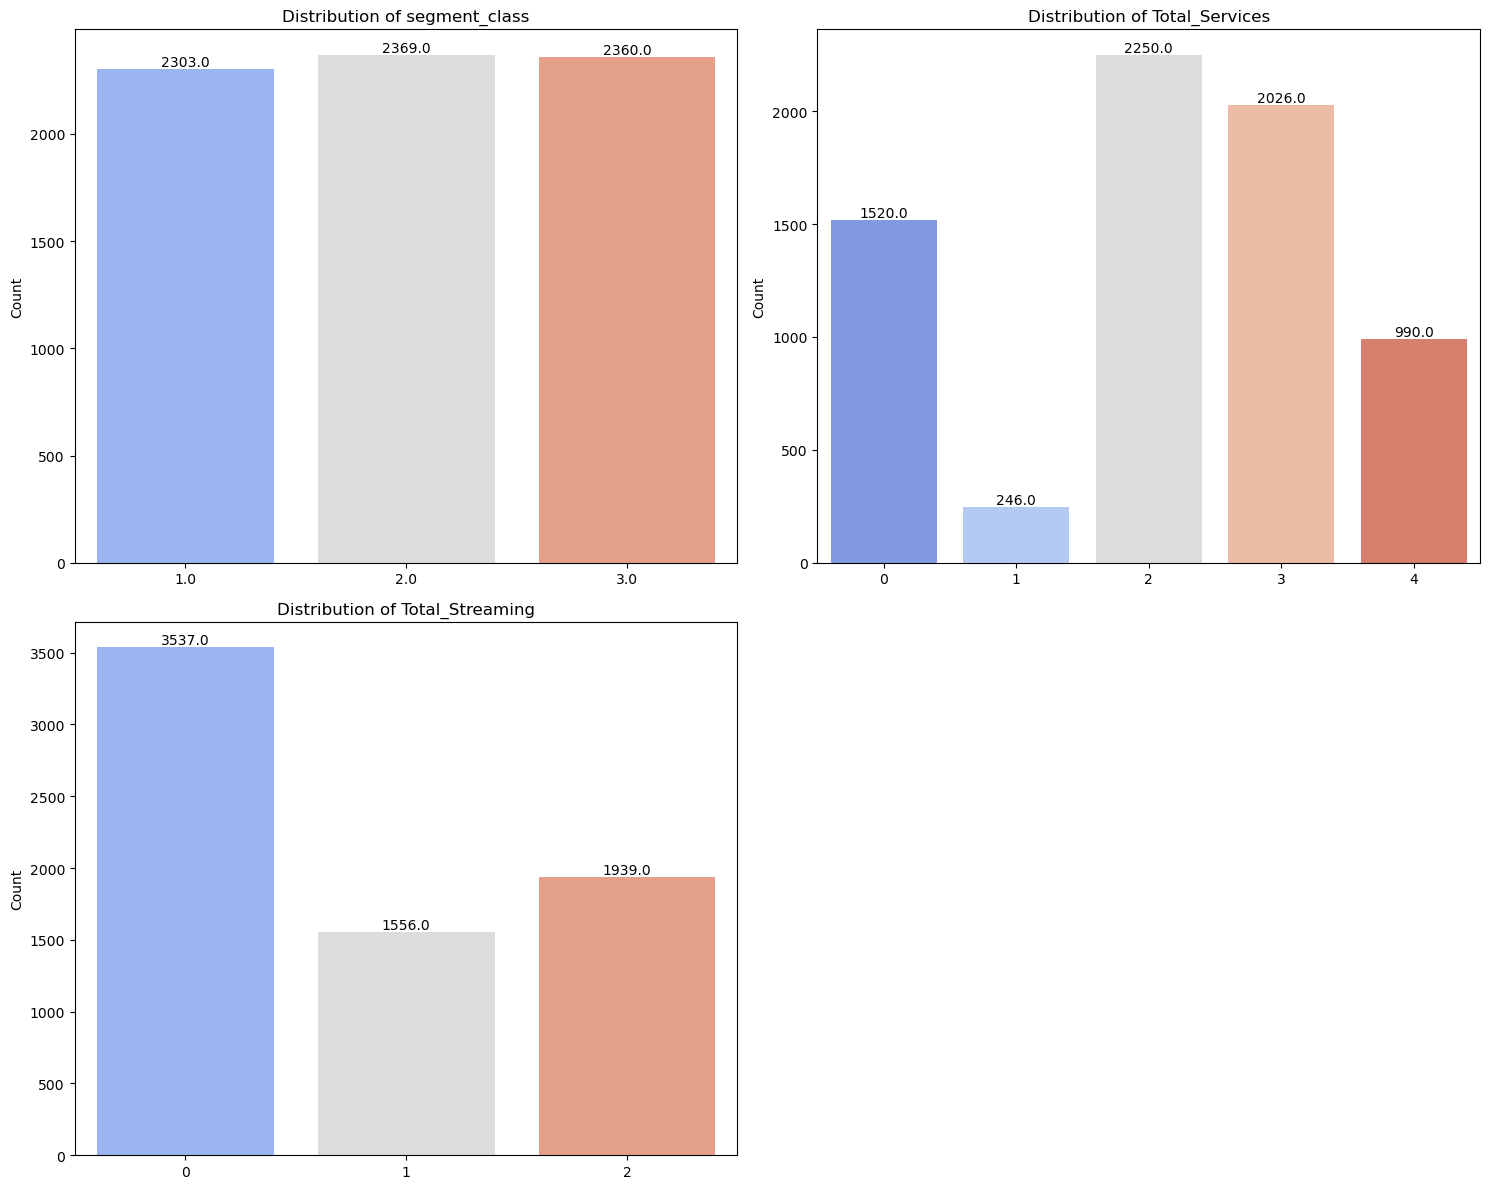

In [21]:
def visualize_features(dataframe):
    feature_columns = ['segment_class','Total_Services','Total_Streaming']
    num_plots = len(feature_columns)
    num_cols = 2
    num_rows = (num_plots - 1) // num_cols + 1
    
    plt.figure(figsize=(15, 12))
    
    for i, feature in enumerate(feature_columns, 1):
        plt.subplot(num_rows, num_cols, i)
        ax = sns.countplot(x=feature, data=dataframe, palette='coolwarm')
        plt.xlabel('')
        plt.ylabel('Count')
        plt.title(f'Distribution of {feature}')
        
        for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='bottom', fontsize=10, color='black')
    
    plt.tight_layout()
    plt.show()

visualize_features(df)

# **Data Preprocessing: Outlier Handling**

In this section, we define a `DataProcessorOutlier` class responsible for preprocessing the data to handle outliers based on a given configuration (`cfg`). This class encapsulates methods to clip, remove, or replace outliers in the input DataFrame.

**1. Outlier Clipping (`outlier_clipper`)**

The `outlier_clipper` method clips the extreme values of numerical columns within the interquartile range (IQR). For each numerical column, it calculates the first and third quartiles (`q1_val` and `q3_val`) and then clips the column's values to be within this range.

**2. Outlier Removal (`outlier_remover`)**

The `outlier_remover` method removes outliers by filtering out rows where numerical column values fall outside a predefined range (`[q1_val, q3_val]`) for each column.

**3. Outlier Replacement (`outlier_replacer`)**

The `outlier_replacer` method replaces outliers with the median value for each numerical column. It utilizes the same IQR-based range as in the previous methods.

After defining these outlier handling methods, the `process_data` function takes a DataFrame as input and applies the specified outlier handling techniques based on the provided configuration (`cfg`).

Finally, an instance of the `DataProcessorOutlier` class is created with a configuration object (`CFG()`), and the `process_data` method is called on the input DataFrame `df`.

In [22]:
class DataProcessorOutlier:
    def __init__(self, cfg):
        self.cfg = cfg

    def process_data(self, dataframe):
        if self.cfg.outlier_clipper:
            for col in dataframe.columns:
                if dataframe[col].dtypes not in ['object', 'category']:
                    q1_val = dataframe[col].quantile(0.25)
                    q3_val = dataframe[col].quantile(0.75)
                    dataframe.loc[:, col] = dataframe[col].clip(lower=q1_val, upper=q3_val)

        if self.cfg.outlier_remover:
            for col in dataframe.columns:
                if dataframe[col].dtypes not in ['object', 'category']:
                    q1_val = dataframe[col].quantile(0.07)
                    q3_val = dataframe[col].quantile(0.93)
                    dataframe = dataframe.loc[(dataframe[col] >= q1_val) & (processed_data[col] <= q3_val)]
                    
        if self.cfg.outlier_replacer:
            for col in dataframe.columns:
                if dataframe[col].dtypes not in ['object', 'category']:
                    median_val = dataframe[col].median()
                    dataframe[col] = dataframe[col].where((dataframe[col] >= q1_val) & (dataframe[col] <= q3_val), median_val)


        return dataframe.head()


data_processor = DataProcessorOutlier(CFG())
data_processor.process_data(df)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,segment_class,Total_Services,Total_Streaming
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,3.0,2,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,2.0,3,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,3.0,4,0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,2.0,2,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,3.0,2,0


# **Data Preprocessing: Encoding Categorical Variables**

In this section, we define a `DataProcessorEncode` class responsible for encoding categorical variables within a given DataFrame. The class offers different encoding techniques based on the provided configuration (`cfg`).

**1. One-Hot Encoding (`one_hot_encoder`)**

The `one_hot_encoder` method applies one-hot encoding to categorical variables with more than two unique values. It identifies such columns (`object_cols`) and creates binary columns for each unique category using the `pd.get_dummies` function. If applicable columns are found, one-hot encoding is applied; otherwise, a warning is issued.

**2. Label Encoding (`label_encoder`)**

The `label_encoder` method applies label encoding to categorical variables with exactly two unique values. It uses the `LabelEncoder` from scikit-learn to transform binary categorical columns into numerical values (0 and 1). Similar to one-hot encoding, a warning is issued if no applicable columns are found.

**3. Ordinal Encoding (`ordinal_encoder`)**

The `ordinal_encoder` method performs ordinal encoding for all categorical columns. It maps unique category values to incremental integer values, effectively transforming categorical variables into ordinal representations. A dictionary (`ordinal_encoder`) is created to store the mapping for each categorical column.

After defining these encoding methods, the `encode_data` function takes a DataFrame as input and applies the specified encoding techniques based on the provided configuration (`cfg`).

Finally, an instance of the `DataProcessorEncode` class is created with a configuration object (`CFG()`), and the `encode_data` method is called on the input DataFrame `df`. The encoded DataFrame `df` is returned and displayed using the `.head()` method.

In [23]:
class DataProcessorEncode:
    def __init__(self, cfg):
        self.cfg = cfg

    def encode_data(self, dataframe):
        if self.cfg.one_hot_encoder:
            object_cols = [col for col in dataframe.columns if dataframe[col].dtype in ["object","category"]
                           and dataframe[col].nunique()>2]
            if len(object_cols) > 0:
                dataframe = pd.get_dummies(dataframe, columns=object_cols)
                print("One-hot encoding applied.")
            else:
                print("Warning: No object or category columns found. One-hot encoding was not applied.")

        if self.cfg.label_encoder:
            label_encoder = LabelEncoder()
            object_cols = [col for col in dataframe.columns if dataframe[col].dtype in ["object","category"]
                           and dataframe[col].nunique()==2]
            if len(object_cols) > 0:
                for col in object_cols:
                    dataframe[col] = label_encoder.fit_transform(dataframe[col])
                print("Label encoding applied.")
            else:
                print("Warning: No object or category columns found. Label encoding was not applied.")
                
        if self.cfg.ordinal_encoder:
            ordinal_encoder = {}
            object_cols = dataframe.select_dtypes(include=['object', 'category']).columns
            if len(object_cols) > 0:
                for col in object_cols:
                    unique_values = sorted(dataframe[col].unique())
                    ordinal_encoder[col] = {value: index for index, value in enumerate(unique_values)}
                    dataframe[col] = dataframe[col].map(ordinal_encoder[col])
                print("Ordinal encoding applied.")
            else:
                print("Warning: No object or category columns found. Ordinal encoding was not applied.")


        return dataframe

data_processor_encode = DataProcessorEncode(CFG())
df = data_processor_encode.encode_data(df)
df.head()

Label encoding applied.
Ordinal encoding applied.


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,segment_class,Total_Services,Total_Streaming
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0,3.0,2,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0,2.0,3,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1,3.0,4,0
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0,2.0,2,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1,3.0,2,0


# **Data Preprocessing: Feature Scaling**

In this section, we define a `DataProcessorScaled` class responsible for scaling numerical features within a given DataFrame. The class provides different scaling techniques based on the provided configuration (`cfg`).

**1. Min-Max Scaling (`min_max_scaler`)**

The `min_max_scaler` method applies Min-Max scaling to numerical columns. It identifies numerical columns (`num_cols`) and scales their values to the range [0, 1] using the `MinMaxScaler` from scikit-learn. If applicable numerical columns are found, Min-Max scaling is applied; otherwise, a warning is issued.

**2. Standard Scaling (`standard_scaler`)**

The `standard_scaler` method applies Standard Scaling (z-score normalization) to numerical columns. Similar to Min-Max scaling, it identifies numerical columns and scales their values to have zero mean and unit variance using the `StandardScaler` from scikit-learn.

**3. Robust Scaling (`robust_scaler`)**

The `robust_scaler` method applies Robust Scaling to numerical columns. This technique is less sensitive to outliers than Min-Max or Standard Scaling. It scales the data using the median and interquartile range. Numerical columns are identified, and their values are scaled using the `RobustScaler` from scikit-learn.

After defining these scaling methods, the `scaled_data` function takes a DataFrame as input and applies the specified scaling techniques based on the provided configuration (`cfg`).

Finally, an instance of the `DataProcessorScaled` class is created with a configuration object (`CFG()`), and the `scaled_data` method is called on the input DataFrame `df`. The scaled DataFrame `df` is returned and displayed using the `.head()` method.

In [24]:
class DataProcessorScaled:
    def __init__(self, cfg):
        self.cfg = cfg

    def scaled_data(self, dataframe):
        if self.cfg.min_max_scaler:
            num_cols = dataframe.select_dtypes(include=['int', 'float']).columns
            if len(num_cols) > 0:
                min_max_scaler = MinMaxScaler()
                dataframe[num_cols] = min_max_scaler.fit_transform(dataframe[num_cols])
                print("Min-Max scaling applied.")
            else:
                print("Warning: No numerical columns found. Min-Max scaling was not applied.")

        if self.cfg.standard_scaler:
            num_cols = dataframe.select_dtypes(include=['int', 'float']).columns
            if len(num_cols) > 0:
                standard_scaler = StandardScaler()
                dataframe[num_cols] = standard_scaler.fit_transform(dataframe[num_cols])
                print("Standard scaling applied.")
            else:
                print("Warning: No numerical columns found. Standard scaling was not applied.")

        if self.cfg.robust_scaler:
            num_cols = dataframe.select_dtypes(include=['int', 'float']).columns
            if len(num_cols) > 0:
                robust_scaler = RobustScaler()
                dataframe[num_cols] = robust_scaler.fit_transform(dataframe[num_cols])
                print("Robust scaling applied.")
            else:
                print("Warning: No numerical columns found. Robust scaling was not applied.")

        return dataframe
    
data_processor_scale = DataProcessorScaled(CFG())
df = data_processor_scale.scaled_data(df)
df.head()

Robust scaling applied.


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,segment_class,Total_Services,Total_Streaming
0,-1.0,0.0,1.0,0.0,-0.608696,-1.0,0.0,-1.0,-0.5,0.5,-0.5,-0.5,-0.5,-0.5,0.0,0.0,0.0,-0.746200,-0.403038,0.0,0.5,0.0,0.0
1,0.0,0.0,0.0,0.0,0.108696,0.0,-0.5,-1.0,0.5,-0.5,0.5,-0.5,-0.5,-0.5,1.0,-1.0,1.0,-0.246891,0.145000,0.0,0.0,0.5,0.0
2,0.0,0.0,0.0,0.0,-0.586957,0.0,-0.5,-1.0,0.5,0.5,-0.5,-0.5,-0.5,-0.5,0.0,0.0,1.0,-0.304007,-0.379963,1.0,0.5,1.0,0.0
3,0.0,0.0,0.0,0.0,0.347826,-1.0,0.0,-1.0,0.5,-0.5,0.5,0.5,-0.5,-0.5,1.0,-1.0,-2.0,-0.516813,0.130633,0.0,0.0,0.0,0.0
4,-1.0,0.0,0.0,0.0,-0.586957,0.0,-0.5,0.0,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,0.0,0.0,0.0,0.006449,-0.367144,1.0,0.5,0.0,0.0


# **Data Splitting and Creation of Training/Test Sets**

In this section, we showcase the process of splitting your dataset into training and test subsets, a fundamental step for training and evaluating machine learning models. The provided code utilizes the `train_test_split` function to partition your dataset into two distinct subsets.

- `test_size`: This parameter determines the proportion of the dataset that will be allocated to the test subset. In this case, a value of `0.2` has been used, signifying that 20% of the data is allocated to the test subset.
- `random_state`: This parameter controls the randomness during the data splitting process. By setting this value, you can reproduce the same data split when you run the process again. Here, it is set to `42`.

Additionally, the target variable (`'Churn'`) is separated from the independent variables (`X`) and assigned to the dependent variable (`y`). These two subsets are then created to encompass training and testing data.

In [25]:
test_size = 0.2
random_state = 42
X = df.drop(columns=['Churn'])
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

# **Handling Class Imbalance with SMOTE**

In this section, we address the issue of class imbalance in the dataset by employing the Synthetic Minority Over-sampling Technique (SMOTE). SMOTE is a technique used to balance the distribution of the classes by generating synthetic samples for the minority class.

First, we import the necessary library, which is `SMOTE` from an undisclosed package (presumably `imblearn.over_sampling`). We initialize the `SMOTE` instance, setting the `random_state` to `42` to ensure reproducibility.

Next, we apply SMOTE to the training data. The `fit_resample` method of the `SMOTE` instance is used for this purpose. It takes the original `X_train` (independent variables) and `y_train` (target variable) as inputs and returns resampled versions, `X_train_resampled` and `y_train_resampled`, respectively.

In [26]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# **Model Training, Evaluation, and Result Visualization**

In this section, a function named `model` is defined to train, evaluate, and visualize the performance of a set of machine learning models. Additionally, another function named `model_to_dataframe` is provided to summarize the results of the model evaluations in a structured DataFrame.

**1. `plot_confusion_matrix` Function**

This function, `plot_confusion_matrix`, takes true labels (`y_true`), predicted labels (`y_pred`), the model's name (`model_name`), and an axis (`ax`) to create and display a confusion matrix heatmap. The confusion matrix visually represents the distribution of correct and incorrect predictions for each class.

**2. `model` Function**

The `model` function performs the following steps for each model specified in the `models` dictionary:

- Fits the model using the resampled training data (`X_train_resampled` and `y_train_resampled`).
- Generates predictions (`y_pred`) on the test set.
- Calculates accuracy, precision, recall, and F1 score using various scoring metrics.
- Stores the evaluation metrics in the `results` dictionary.
- Calls the `plot_confusion_matrix` function to visualize the confusion matrix for the current model.

Finally, it displays a grid of confusion matrix heatmaps for each model using `matplotlib` and returns the `results` dictionary containing the evaluation metrics.

**3. `model_to_dataframe` Function**

This function, `model_to_dataframe`, utilizes the `model` function to evaluate the models' performance and converts the resulting `results` dictionary into a structured DataFrame. The DataFrame includes columns for 'Accuracy', 'Precision', 'Recall', and 'F1 Score' for each model.

The models are trained, evaluated, and ranked based on their accuracy in descending order. The resulting DataFrame provides an overview of the performance of different machine learning models on the test set.

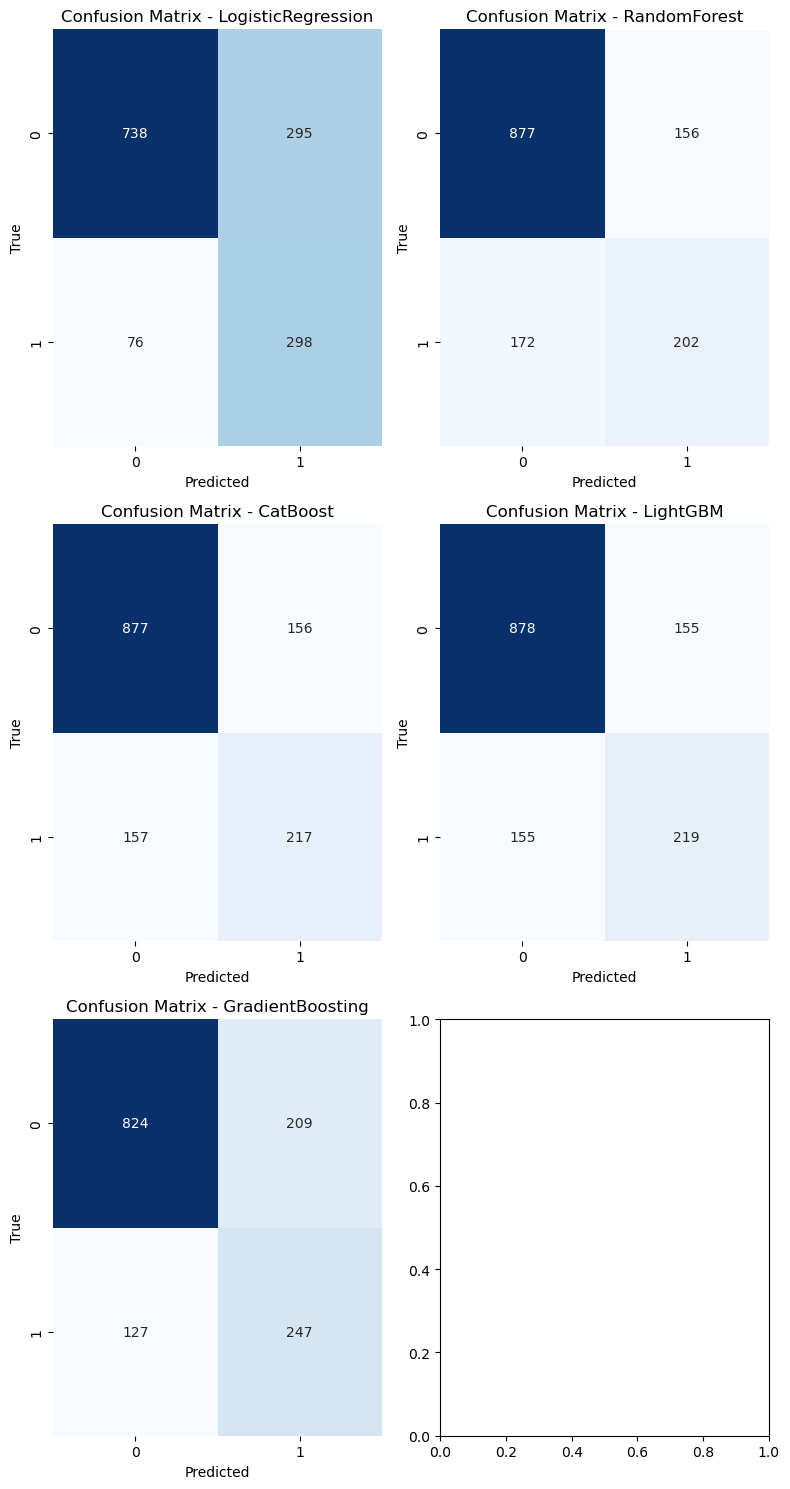

,Accuracy,Precision,Recall,F1 Score
LightGBM,0.779673,0.779673,0.779673,0.779673
CatBoost,0.777541,0.777352,0.777541,0.777446
RandomForest,0.766880,0.763789,0.766880,0.765228
GradientBoosting,0.761194,0.780123,0.761194,0.768055
LogisticRegression,0.736318,0.799217,0.736318,0.750544


In [27]:
def plot_confusion_matrix(y_true, y_pred, model_name, ax):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title(f'Confusion Matrix - {model_name}')

def model(df, test_size=0.2, random_state=42):
    
    models = {
        'LogisticRegression': LogisticRegression(max_iter=5000, solver='lbfgs'),
        'RandomForest': RandomForestClassifier(),
        'CatBoost': CatBoostClassifier(verbose=False),
        'LightGBM': lgb.LGBMClassifier(),
        'GradientBoosting': GradientBoostingClassifier()
    }

    results = {}
    
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 15))
    axes = axes.flatten()
    results = {}

    for i, (model_name, model) in enumerate(models.items()):
        model.fit(X_train_resampled, y_train_resampled)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        results[model_name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        }

        plot_confusion_matrix(y_test, y_pred, model_name, axes[i])

    plt.tight_layout()
    plt.show()
    
    return results

def model_to_dataframe(df, test_size=0.2, random_state=42):
    results = model(df, test_size, random_state)
    result_df = pd.DataFrame(results).T
    result_df = result_df.sort_values(by='Accuracy', ascending=False)
    return result_df

model_to_dataframe(df)

# **Hyperparameter Tuning Function**

This function, named `hyperparameter_tuning`, is designed for performing hyperparameter tuning for a collection of machine learning models. It takes a dictionary of `models` along with corresponding `params` (hyperparameter grids), input features `X`, target variable `y`, and an optional `cv` (cross-validation) parameter.

The function iterates through each model specified in the `models` dictionary and performs hyperparameter tuning if hyperparameters are provided in the `params` dictionary. For each model, it follows these steps:

1. If the model doesn't require hyperparameters, it skips tuning for that model and proceeds to the next one.

2. If the model is an instance of `CatBoostClassifier`, it sets the verbosity level to 0 to suppress intermediate output during training.

3. It uses `GridSearchCV` to perform cross-validated grid search over the specified hyperparameter grid (`params[model_name]`) for the given model. The `cv` parameter controls the number of folds in cross-validation, and `n_jobs=-1` indicates that computations are parallelized across all available CPU cores.

4. The best parameters, best score, and best model obtained from the grid search are stored in the `best_models` dictionary.

5. The function prints the best parameters and best score for the current model.

Finally, the function returns a dictionary (`best_models`) containing the best parameters and scores for the models that were subject to hyperparameter tuning.

**Note**: Ensure that you have the required libraries imported (`GridSearchCV`, `CatBoostClassifier`, etc.) and the necessary configurations set before calling this function.

In [28]:
def hyperparameter_tuning(models, params, X, y, cv=5):
    best_models = {}
    
    for model_name, model in models.items():
        if model_name not in params:
            print(f"Skipping Hyperparameter Tuning for {model_name} as it doesn't require hyperparameters.")
            continue
        
        print(f"Performing Hyperparameter Tuning for {model_name}...")
        if isinstance(model, CatBoostClassifier):
            model.set_params(verbose=0)
        
        grid_search_cv = GridSearchCV(model, params[model_name], cv=cv, n_jobs=-1)
        grid_search_cv.fit(X, y)
        
        best_params = grid_search_cv.best_params_
        best_score = grid_search_cv.best_score_
        best_model = grid_search_cv.best_estimator_
        
        best_models[model_name] = {
            'Best Parameters': best_params,
            'Best Score': best_score,
        }
        
        print(f"{model_name} - Best Parameters:", best_params)
        print(f"{model_name} - Best Score:", best_score)
        print("\n")
    
    return best_models

# **Model Hyperparameter Tuning and Result Analysis**

In this section, a collection of machine learning models are subjected to hyperparameter tuning, and the resulting best models are analyzed. The code provided showcases the process of defining models, specifying hyperparameter grids, performing hyperparameter tuning, and presenting the results.

**1. Model and Hyperparameter Definitions**

A dictionary named `models` contains a set of machine learning models, including 'LogisticRegression', 'RandomForest', 'CatBoost', 'LightGBM', and 'GradientBoosting'. Each model is instantiated with default hyperparameters.

A corresponding dictionary named `params` holds hyperparameter grids for each model. Hyperparameters are defined within the grid to be tuned during the process. The ranges or options for hyperparameters are provided using `numpy` functions like `np.arange`.

**2. Hyperparameter Tuning**

The `hyperparameter_tuning` function is called with the `models`, `params`, and resampled training data (`X_train_resampled` and `y_train_resampled`). This function iterates through each model, performing grid search cross-validation to find the best hyperparameters for each model.

**3. Result Analysis**

The `results_to_dataframe` function converts the obtained best models and their information into a structured DataFrame. This DataFrame includes columns for 'Model', 'Best Parameters', and 'Best Score'.

Finally, the `result_df` DataFrame is created using the `results_to_dataframe` function and sorted in descending order based on the 'Best Score'. This DataFrame provides an overview of the best hyperparameters and their corresponding scores for each model.

The entire process provides insight into the optimal hyperparameters for each model and allows for easy comparison of model performance.

In [29]:
models = {
    'LogisticRegression': LogisticRegression(),
    'RandomForest': RandomForestClassifier(),
    'CatBoost': CatBoostClassifier(),
    'LightGBM': lgb.LGBMClassifier(),
    'GradientBoosting': GradientBoostingClassifier()
}

params = {
    'LogisticRegression': {'C': np.arange(1,11), 'penalty': ['l1', 'l2'], 
                           'max_iter': [5000], 'solver': ['lbfgs','saga']},
    
    'RandomForest': {'n_estimators': np.arange(100,1001,100), 
                     'criterion': ['gini','entropy'],
                     'max_depth': np.arange(1,13,2)},
    
    'CatBoost': {'iterations': np.arange(100,501,100),
                 'learning_rate': np.arange(0,0.101,0.05),
                 'depth': np.arange(1,13,2)},
    
    'LightGBM': {'num_leaves': np.arange(100,1001,100), 
                 'max_depth': np.arange(1,13,2), 'verbose': [-1]},
    
    'GradientBoosting': {'n_estimators': np.arange(100,1001,100), 
                         'loss': ['log_loss','equivalent'],
                         'learning_rate': np.arange(0,0.101,0.05)}
}

best_models = hyperparameter_tuning(models, params, X_train_resampled, y_train_resampled)

def results_to_dataframe(best_models):
    results = []

    for model_name, model_info in best_models.items():
        params = model_info['Best Parameters']
        score = model_info['Best Score'],

        results.append({
            'Model': model_name,
            'Best Parameters': params,
            'Best Score': score
        })

    return pd.DataFrame(results)

result_df = results_to_dataframe(best_models)
result_df.sort_values(by='Best Score', ascending=False)

Performing Hyperparameter Tuning for LogisticRegression...
LogisticRegression - Best Parameters: {'C': 9, 'max_iter': 5000, 'penalty': 'l2', 'solver': 'lbfgs'}
LogisticRegression - Best Score: 0.7734866828087167


Performing Hyperparameter Tuning for RandomForest...
RandomForest - Best Parameters: {'criterion': 'gini', 'max_depth': 11, 'n_estimators': 700}
RandomForest - Best Score: 0.8446731234866828


Performing Hyperparameter Tuning for CatBoost...
CatBoost - Best Parameters: {'depth': 11, 'iterations': 400, 'learning_rate': 0.05}
CatBoost - Best Score: 0.8544794188861987


Performing Hyperparameter Tuning for LightGBM...
LightGBM - Best Parameters: {'max_depth': 7, 'num_leaves': 100, 'verbose': -1}
LightGBM - Best Score: 0.8475786924939467


Performing Hyperparameter Tuning for GradientBoosting...
GradientBoosting - Best Parameters: {'learning_rate': 0.1, 'loss': 'log_loss', 'n_estimators': 300}
GradientBoosting - Best Score: 0.841767554479419




,Model,Best Parameters,Best Score
2,CatBoost,"{'depth': 11, 'iterations': 400, 'learning_rat...","(0.8544794188861987,)"
3,LightGBM,"{'max_depth': 7, 'num_leaves': 100, 'verbose':...","(0.8475786924939467,)"
1,RandomForest,"{'criterion': 'gini', 'max_depth': 11, 'n_esti...","(0.8446731234866828,)"
4,GradientBoosting,"{'learning_rate': 0.1, 'loss': 'log_loss', 'n_...","(0.841767554479419,)"
0,LogisticRegression,"{'C': 9, 'max_iter': 5000, 'penalty': 'l2', 's...","(0.7734866828087167,)"


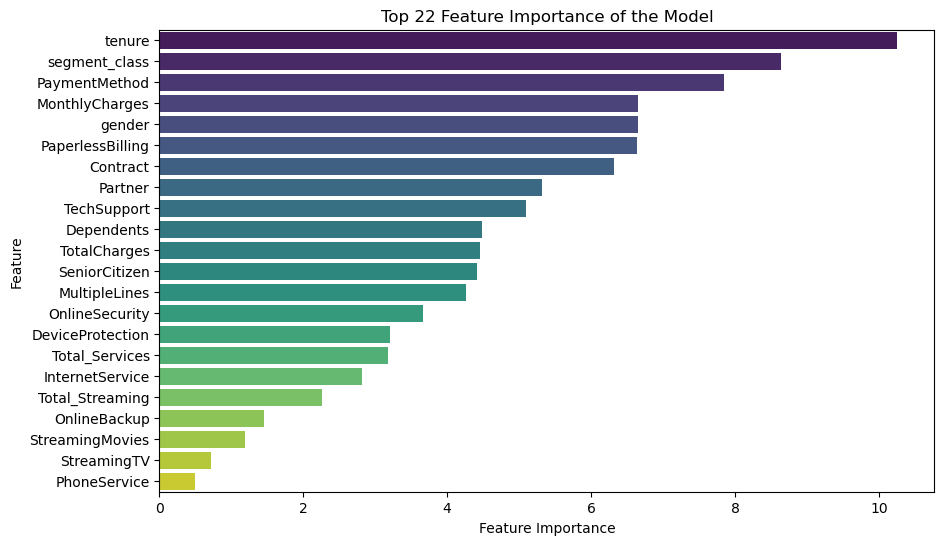

In [30]:
def plot_feature_importance(model, feature_names, top_n=None):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    else:
        raise ValueError("Feature importance not available for this model.")
    
    if top_n is not None:
        indices = np.argsort(importances)[::-1]
        top_indices = indices[:top_n]
        top_importances = importances[top_indices]
        top_feature_names = np.array(feature_names)[top_indices]
    else:
        top_importances = importances
        top_feature_names = np.array(feature_names)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_importances, y=top_feature_names, palette='viridis')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title('Top {} Feature Importance of the Model'.format(len(top_feature_names)))
    plt.show()

model = CatBoostClassifier(verbose=0)
model.fit(X_train_resampled, y_train_resampled)

plot_feature_importance(model, X.columns, top_n=len(X.columns))
